# Import Data

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/flights.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Data

In [ ]:
df_feature = df[['YEAR','MONTH','DAY','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']]

In [ ]:
df_feature = df_feature.dropna()

In [ ]:
df_feature.AIRLINE = pd.Categorical(df_feature.AIRLINE)
df_feature['AIR_CODE'] = df_feature.AIRLINE.cat.codes
df_feature

,YEAR,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_CODE
0,2015,1,1,AS,ANC,SEA,1448,-11.0,-22.0,1
1,2015,1,1,AA,LAX,PBI,2330,-8.0,-9.0,0
2,2015,1,1,US,SFO,CLT,2296,-2.0,5.0,11
3,2015,1,1,AA,LAX,MIA,2342,-5.0,-9.0,0
4,2015,1,1,AS,SEA,ANC,1448,-1.0,-21.0,1
...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,B6,LAX,BOS,2611,-4.0,-26.0,2
5819075,2015,12,31,B6,JFK,PSE,1617,-4.0,-16.0,2
5819076,2015,12,31,B6,JFK,SJU,1598,-9.0,-8.0,2
5819077,2015,12,31,B6,MCO,SJU,1189,-6.0,-10.0,2


In [ ]:
df_feature = df_feature.reset_index()
df_feature = df_feature.drop(columns=['index'])

In [ ]:
df_feature

,YEAR,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_CODE
0,2015,1,1,AS,ANC,SEA,1448,-11.0,-22.0,1
1,2015,1,1,AA,LAX,PBI,2330,-8.0,-9.0,0
2,2015,1,1,US,SFO,CLT,2296,-2.0,5.0,11
3,2015,1,1,AA,LAX,MIA,2342,-5.0,-9.0,0
4,2015,1,1,AS,SEA,ANC,1448,-1.0,-21.0,1
...,...,...,...,...,...,...,...,...,...,...
5714003,2015,12,31,B6,LAX,BOS,2611,-4.0,-26.0,2
5714004,2015,12,31,B6,JFK,PSE,1617,-4.0,-16.0,2
5714005,2015,12,31,B6,JFK,SJU,1598,-9.0,-8.0,2
5714006,2015,12,31,B6,MCO,SJU,1189,-6.0,-10.0,2


In [ ]:
X = df_feature[['AIR_CODE','DISTANCE','DEPARTURE_DELAY']]
y = df_feature['ARRIVAL_DELAY']

In [ ]:
import datetime
test = df_feature[['YEAR','MONTH','DAY']]

In [ ]:
test2 = pd.to_datetime(test)
X['DATE'] = test2
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AIR_CODE,DISTANCE,DEPARTURE_DELAY,DATE
0,1,1448,-11.0,2015-01-01
1,0,2330,-8.0,2015-01-01
2,11,2296,-2.0,2015-01-01
3,0,2342,-5.0,2015-01-01
4,1,1448,-1.0,2015-01-01
...,...,...,...,...
5714003,2,2611,-4.0,2015-12-31
5714004,2,1617,-4.0,2015-12-31
5714005,2,1598,-9.0,2015-12-31
5714006,2,1189,-6.0,2015-12-31


In [ ]:
X['DATE'] = X['DATE'].apply(lambda x: x.toordinal())
X

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AIR_CODE,DISTANCE,DEPARTURE_DELAY,DATE
0,1,1448,-11.0,735599
1,0,2330,-8.0,735599
2,11,2296,-2.0,735599
3,0,2342,-5.0,735599
4,1,1448,-1.0,735599
...,...,...,...,...
5714003,2,2611,-4.0,735963
5714004,2,1617,-4.0,735963
5714005,2,1598,-9.0,735963
5714006,2,1189,-6.0,735963


# Bulding Model : DecisionTreeRegressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
model = DecisionTreeRegressor(random_state=1)

# Fit model
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
print("Making predictions for the following 5 flights:")
print(X[725170:725190])
print("The predictions are")
print(model.predict(X[725170:725190]))

Making predictions for the following 5 flights:
        AIR_CODE  DISTANCE  DEPARTURE_DELAY    DATE
725170         2      1754             13.0  735648
725171         2       444             -7.0  735648
725172         3       352             -2.0  735648
725173         3       761              2.0  735648
725174         0      2311             -7.0  735648
725175         0      1431             -4.0  735648
725176         0      1171             -2.0  735648
725177         0       237              1.0  735648
725178         0      1045             -5.0  735648
725179         0       919             -4.0  735648
725180         0      1846             -2.0  735648
725181         2       474              7.0  735648
725182         0      1119              0.0  735648
725183         0       733             -1.0  735648
725184         3      1123             -1.0  735648
725185         3       515              0.0  735648
725186         3       632             22.0  735648
725187         3

In [ ]:
df_feature[725170:725190]

,YEAR,MONTH,DAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_CODE
725170,2015,2,19,B6,DEN,BOS,1754,13.0,24.0,2
725171,2015,2,19,B6,DCA,CHS,444,-7.0,-7.0,2
725172,2015,2,19,DL,ATL,GPT,352,-2.0,-8.0,3
725173,2015,2,19,DL,OKC,ATL,761,2.0,2.0,3
725174,2015,2,19,AA,LAX,DCA,2311,-7.0,-6.0,0
725175,2015,2,19,AA,DFW,SMF,1431,-4.0,-8.0,0
725176,2015,2,19,AA,DFW,SAN,1171,-2.0,8.0,0
725177,2015,2,19,AA,TUL,DFW,237,1.0,-4.0,0
725178,2015,2,19,AA,MIA,SJU,1045,-5.0,-22.0,0
725179,2015,2,19,AA,MIA,DCA,919,-4.0,-8.0,0


In [ ]:
from sklearn.metrics import mean_absolute_error

predicted_flights = model.predict(X)
mean_absolute_error(y, predicted_flights)

1.8194821427509413

In [ ]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
model = DecisionTreeRegressor()
# Fit model
model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

12.136643686767014


# Improve Model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [ ]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000, 10000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  11.885000
Max leaf nodes: 50  		 Mean Absolute Error:  9.062539
Max leaf nodes: 500  		 Mean Absolute Error:  8.816988
Max leaf nodes: 5000  		 Mean Absolute Error:  8.769602
Max leaf nodes: 10000  		 Mean Absolute Error:  8.794416


[Text(167.4, 181.2, 'X[2] <= 70.5\nmse = 1539.633\nsamples = 4285506\nvalue = 4.405'),
 Text(83.7, 108.72, 'X[2] <= 17.5\nmse = 367.913\nsamples = 4087128\nvalue = -1.897'),
 Text(41.85, 36.23999999999998, 'mse = 180.452\nsamples = 3579097\nvalue = -6.58'),
 Text(125.55000000000001, 36.23999999999998, 'mse = 445.815\nsamples = 508031\nvalue = 31.092'),
 Text(251.10000000000002, 108.72, 'X[2] <= 221.5\nmse = 8002.413\nsamples = 198378\nvalue = 134.249'),
 Text(209.25, 36.23999999999998, 'mse = 1749.573\nsamples = 177811\nvalue = 112.283'),
 Text(292.95, 36.23999999999998, 'mse = 21824.1\nsamples = 20567\nvalue = 324.158')]

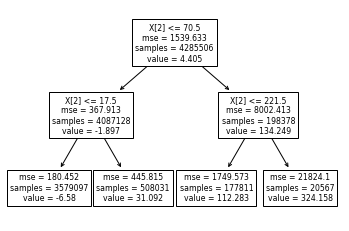

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_leaf_nodes=5000,max_depth = 2,random_state=0)
iris = load_iris()
clf = clf.fit(train_X, train_y)
tree.plot_tree(clf)  # doctest: +SKIP